In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from small_script.myFunctions import *
import feather
import Bio.PDB as bio
d3_to_index = bio.Polypeptide.d3_to_index  # we may want to adjust this in the future.
three_to_one = bio.Polypeptide.three_to_one
one_to_index = bio.Polypeptide.one_to_index
plt.rcParams['figure.figsize'] = [16.18033, 10]

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data_original = pd.read_csv("/Users/weilu/Research/optimization/fragment/clustered_bin2_jan18.csv", index_col=0)

/Users/weilu/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data = data_original.fillna(-1)[["pdb", "i", "seq","dd", "category", "count"]]
data["category"] = data["category"].astype(int)
data["count"] = data["count"].astype(int)

In [4]:
for i in range(1,10):
    data[f"s{i}"] = data["seq"].apply(lambda x: one_to_index(x[i-1]))

In [15]:
data.to_feather("/Users/weilu/Research/optimization/fragment/feather_cluster_data.feather")

In [13]:
data.head()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1igqB00,0,DKLKKAIVQ,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",-1,-1,2,8,9,8,8,0,7,17,13
1,1igqB00,1,KLKKAIVQV,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",-1,-1,8,9,8,8,0,7,17,13,17
2,1igqB00,2,LKKAIVQVE,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",-1,-1,9,8,8,0,7,17,13,17,3
3,1igqB00,3,KKAIVQVEH,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987,13,8,8,0,7,17,13,17,3,6
4,1igqB00,4,KAIVQVEHD,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835,18,8,0,7,17,13,17,3,6,2


In [14]:
data.tail()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
1901425,1xjhA00,49,NAMDIAEIR,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,7,5",1,20575,11,0,10,2,7,0,3,7,14
1901426,1xjhA00,50,AMDIAEIRN,"5,7,9,9,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",2,18996,0,10,2,7,0,3,7,14,11
1901427,1xjhA00,51,MDIAEIRNN,"5,7,9,9,11,13,5,7,9,11,11,5,7,9,9,5,7,9,5,7,5",3,18382,10,2,7,0,3,7,14,11,11
1901428,1xjhA00,52,DIAEIRNNA,"5,7,9,11,11,11,5,7,9,9,11,5,7,9,11,5,7,9,5,5,5",81,745,2,7,0,3,7,14,11,11,0
1901429,1xjhA00,53,IAEIRNNAS,"5,7,9,9,11,11,5,7,9,11,11,5,7,9,11,5,5,7,5,5,5",2071,46,7,0,3,7,14,11,11,0,15


In [6]:
data.shape

(1901430, 15)

In [7]:
data.query("count != -1").shape

(753824, 15)

In [8]:
data.query("count > 500").shape

(325598, 15)

In [12]:
data.query("count != -1").sample(10)

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
83349,4pz0A01,131,GDSFEVKGI,"11,13,17,21,21,19,11,13,17,19,17,11,13,15,13,1...",6062,20,5,2,15,4,3,17,8,5,7
376107,3ot5A02,26,MQGMFEAVR,"5,7,9,9,11,13,5,7,9,11,11,5,7,9,9,5,7,9,5,7,5",3,18382,10,13,5,10,4,3,0,17,14
77904,1fmzA00,147,QYIGIHRDR,"9,13,15,19,21,25,11,13,17,19,23,9,13,15,19,11,...",927,87,13,19,7,5,7,6,14,2,14
1335697,2je2A00,3,AEFNDKGEL,"11,13,15,11,11,7,11,11,9,9,7,7,5,5,5,5,5,7,7,9,9",1664,55,0,3,4,11,2,8,5,3,9
531509,3i5xA02,26,HIKKQIKER,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,5,5",34,1811,6,7,8,8,13,7,8,3,14
912144,4qtuB00,151,DQVDDILQS,"5,7,9,9,11,13,5,7,9,9,11,5,7,9,11,5,5,9,5,7,5",14,4800,2,13,17,2,2,7,9,13,15
1182231,1sbzA00,155,ARVLDQFGL,"5,7,9,11,11,9,5,7,9,9,9,5,7,9,9,5,7,5,5,5,7",60,1011,0,14,17,9,2,13,4,5,9
1438574,2cfuA01,327,GNAEIVEVL,"5,7,9,11,11,13,5,7,9,9,11,5,7,9,11,5,7,9,5,7,5",4,14304,5,11,0,3,7,17,3,17,9
1346608,3p32A01,12,DRAALPRAI,"5,7,9,11,11,13,5,7,9,11,11,7,7,9,11,5,7,9,5,7,5",328,207,2,14,0,0,9,12,14,0,7
1468369,4ds7E00,11,LVLACVRMK,"5,7,9,9,11,13,5,7,9,9,11,5,7,9,9,5,7,9,5,7,5",0,39130,9,17,9,0,1,17,14,10,8


In [11]:
data.query("category == 0").shape

(39130, 15)

In [17]:
data.head()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1igqB00,0,DKLKKAIVQ,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",-1,-1,2,8,9,8,8,0,7,17,13
1,1igqB00,1,KLKKAIVQV,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",-1,-1,8,9,8,8,0,7,17,13,17
2,1igqB00,2,LKKAIVQVE,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",-1,-1,9,8,8,0,7,17,13,17,3
3,1igqB00,3,KKAIVQVEH,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987,13,8,8,0,7,17,13,17,3,6
4,1igqB00,4,KAIVQVEHD,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835,18,8,0,7,17,13,17,3,6,2


In [108]:
data.head().iloc[:,6:]

,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,2,8,9,8,8,0,7,17,13
1,8,9,8,8,0,7,17,13,17
2,9,8,8,0,7,17,13,17,3
3,8,8,0,7,17,13,17,3,6
4,8,0,7,17,13,17,3,6,2


In [18]:
test = data.query("count > 500")


In [19]:
train_x = test.iloc[:,6:].values
train_y = test["category"].values

In [ ]:
train_x.shape

In [ ]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(train_x, train_y) 
svm_predictions = svm_model_linear.predict(train_x) 

In [ ]:
from sklearn.metrics import confusion_matrix 
# model accuracy for X_test   
accuracy = svm_model_linear.score(train_x, train_y) 
  
# creating a confusion matrix 
cm = confusion_matrix(train_y, svm_predictions) 

In [111]:
train_x.shape

(1901430, 9)

In [115]:
train_y

array([  -1,   -1,   -1, ...,    3,   81, 2071])

In [114]:
train_y.shape

(1901430,)

In [68]:
seq_count = data["seq"].value_counts()
filtered_seq_count = seq_count[seq_count>1].reset_index().rename(columns={"seq":"index", "index":"seq"})
data_filtered = data_original.merge(filtered_seq_count, on="seq")

In [95]:
def get_total_std(a):
    return a.iloc[:,3:6].std().sum()

In [99]:
data_filtered_total_std = data_filtered.groupby("seq").apply(get_total_std)

# small total std dominates. 

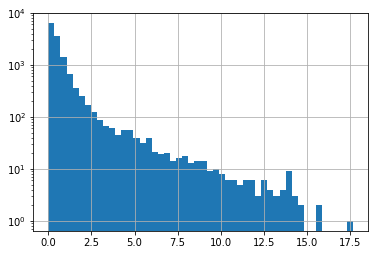

In [104]:
data_filtered_total_std.hist(bins=50, log=True)

In [46]:
data_original.head()

,pdb,i,seq,dis1,dis2,dis3,dis4,dis5,dis6,dis7,...,d15,d16,d17,d18,d19,d20,d21,dd,category,count
0,1igqB00,0,DKLKKAIVQ,9.545797,12.242739,11.389445,14.435853,15.702080,18.185148,9.427593,...,15,9,13,15,9,13,9,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",NaN,NaN
1,1igqB00,1,KLKKAIVQV,9.427593,9.508488,13.046163,14.956468,17.811722,21.096529,5.881323,...,19,9,13,17,9,13,9,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",NaN,NaN
2,1igqB00,2,LKKAIVQVE,5.881323,9.385722,11.658462,14.435720,17.857430,21.547594,9.566237,...,19,9,13,17,9,13,11,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",NaN,NaN
3,1igqB00,3,KKAIVQVEH,9.566237,12.596333,15.433746,18.900240,22.492163,25.003511,9.934756,...,19,9,13,15,11,13,11,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987.0,13.0
4,1igqB00,4,KAIVQVEHD,9.934756,12.622395,16.016058,19.465660,21.763054,25.281502,9.527388,...,19,11,13,17,11,13,11,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835.0,18.0


In [44]:
data.head()

,pdb,i,seq,dd,category,count,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1igqB00,0,DKLKKAIVQ,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1...",-1,-1,2,8,9,8,8,0,7,17,13
1,1igqB00,1,KLKKAIVQV,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1...",-1,-1,8,9,8,8,0,7,17,13,17
2,1igqB00,2,LKKAIVQVE,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,...",-1,-1,9,8,8,0,7,17,13,17,3
3,1igqB00,3,KKAIVQVEH,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13...",9987,13,8,8,0,7,17,13,17,3,6
4,1igqB00,4,KAIVQVEHD,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1...",6835,18,8,0,7,17,13,17,3,6,2


In [6]:
data.dtypes

pdb          object
i             int64
seq          object
dis1        float64
dis2        float64
dis3        float64
dis4        float64
dis5        float64
dis6        float64
dis7        float64
dis8        float64
dis9        float64
dis10       float64
dis11       float64
dis12       float64
dis13       float64
dis14       float64
dis15       float64
dis16       float64
dis17       float64
dis18       float64
dis19       float64
dis20       float64
dis21       float64
DisType      object
d1            int64
d2            int64
d3            int64
d4            int64
d5            int64
d6            int64
d7            int64
d8            int64
d9            int64
d10           int64
d11           int64
d12           int64
d13           int64
d14           int64
d15           int64
d16           int64
d17           int64
d18           int64
d19           int64
d20           int64
d21           int64
dd           object
category    float64
count       float64
dtype: object